In [ ]:
#Evaluation of quadratic equation roots using LLM
#get the discriminant and then roots based on its value
#based on the value of discriminant we have 3 cases - positive, zero and negative. get roots accordingly
#using conditional transitions based on state values and reducer to aggregate roots
from langgraph.graph import StateGraph,START, END
from typing import TypedDict,Literal

In [39]:
#define state
class QuadState(TypedDict):
    a:int
    b:int
    c:int

    equation:str
    discriminant: float
    result:str

In [40]:
def show_equation(state:QuadState):
    equation=f"{state['a']}x^2 + {state['b']}x + {state['c']} = 0"
    return {'equation':equation}

def calculate_discriminant(state:QuadState):
    discriminant=state['b']**2 - 4*state['a']*state['c']
    return {'discriminant':discriminant}

def real_roots(state:QuadState):
  
    root1=(-state['b'] + state['discriminant']**0.5)/(2*state['a'])
    root2=(-state['b'] - state['discriminant']**0.5)/(2*state['a'])
    result=f"Real roots are: {root1} and {root2}"
    return {'result':result}

def repeated_root(state:QuadState):
    root=-state['b']/(2*state['a'])
    result=f"Repeated real root is: {root}"
    return {'result':result}

def no_real_roots(state:QuadState):
    return {'result':"No real roots exist."}    

#this is the condition function which decides the path
def check_condtion(state:QuadState)->Literal['real_roots','repeated_root','no_real_roots']:
    if state['discriminant'] >0:
        return 'real_roots'
    elif state['discriminant']==0:
        return 'repeated_root'
    else:
        return 'no_real_roots'

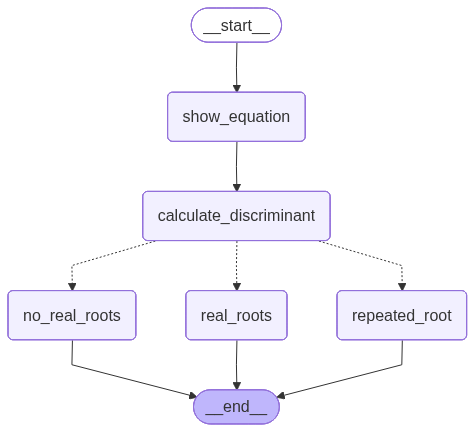

In [41]:
graph=StateGraph(QuadState)

graph.add_node('show_equation',show_equation)
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('real_roots',real_roots)
graph.add_node('repeated_root',repeated_root)
graph.add_node('no_real_roots',no_real_roots)

graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discriminant')
graph.add_conditional_edges('calculate_discriminant',check_condtion)
graph.add_edge('real_roots',END)
graph.add_edge('repeated_root',END)
graph.add_edge('no_real_roots',END)
graph.compile()

In [42]:
workflow=graph.compile()
initial_state:QuadState={
    'a':1,
    'b':-3,
    'c':2
}
final_state=workflow.invoke(initial_state)
print(final_state)


{'a': 1, 'b': -3, 'c': 2, 'equation': '1x^2 + -3x + 2 = 0', 'discriminant': 1, 'result': 'Real roots are: 2.0 and 1.0'}
